In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import math
from lightgbm import LGBMRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from statsmodels.tsa.api import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error
#from statsforecast.core import StatsForecast
from xgboost import XGBRegressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras import regularizers
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, LSTM,Flatten
from keras.layers import Conv2D,MaxPooling2D

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML/train.csv')

In [ ]:
dft = pd.read_csv('/content/drive/MyDrive/ML/supplemental_train.csv')

In [ ]:
dft["datetime"] = pd.to_datetime(dft["timestamp"], unit="s")
dft.head()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,datetime
0,1632182460,3,561.0,2.079028,2.080605,2.0720,2.076458,2.804627e+05,2.075869,0.003085,2021-09-21 00:01:00
1,1632182460,2,169.0,541.006000,541.200000,539.7000,540.722000,1.889432e+02,540.716930,-0.000607,2021-09-21 00:01:00
2,1632182460,0,400.0,363.737500,363.900000,363.0000,363.654000,8.792685e+02,363.499554,-0.019375,2021-09-21 00:01:00
3,1632182460,1,1933.0,42986.143333,43001.000000,42898.0000,42947.065566,9.183861e+01,42942.976718,-0.000374,2021-09-21 00:01:00
4,1632182460,4,348.0,0.208326,0.208400,0.2078,0.208200,1.051337e+06,0.208077,-0.001233,2021-09-21 00:01:00


In [ ]:
dft.groupby(['Asset_ID'])['datetime'].max()
#supplemental train data is from 2021-09-21 to 2022-01-24

Asset_ID
0    2022-01-24
1    2022-01-24
2    2022-01-24
3    2022-01-24
4    2022-01-24
5    2022-01-24
6    2022-01-24
7    2022-01-24
8    2022-01-24
9    2022-01-24
10   2022-01-24
11   2022-01-24
12   2022-01-24
13   2022-01-24
Name: datetime, dtype: datetime64[ns]

In [ ]:
dft.isna().sum()*100/len(dft)
#Only 0.1% missing values in target data

timestamp    0.000000
Asset_ID     0.000000
Count        0.000000
Open         0.000000
High         0.000000
Low          0.000000
Close        0.000000
Volume       0.000000
VWAP         0.000000
Target       0.116071
datetime     0.000000
dtype: float64

In [ ]:
df["datetime"] = pd.to_datetime(df["timestamp"], unit="s")

In [ ]:
df.head()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,datetime
0,1514764860,2,40.0,2376.5800,2399.5000,2357.1400,2374.5900,19.233005,2373.116392,-0.004218,2018-01-01 00:01:00
1,1514764860,0,5.0,8.5300,8.5300,8.5300,8.5300,78.380000,8.530000,-0.014399,2018-01-01 00:01:00
2,1514764860,1,229.0,13835.1940,14013.8000,13666.1100,13850.1760,31.550062,13827.062093,-0.014643,2018-01-01 00:01:00
3,1514764860,5,32.0,7.6596,7.6596,7.6567,7.6576,6626.713370,7.657713,-0.013922,2018-01-01 00:01:00
4,1514764860,7,5.0,25.9200,25.9200,25.8740,25.8770,121.087310,25.891363,-0.008264,2018-01-01 00:01:00


In [ ]:
df.groupby(['Asset_ID'])['datetime'].min()

Asset_ID
0    2018-01-01 00:01:00
1    2018-01-01 00:01:00
2    2018-01-01 00:01:00
3    2018-04-17 09:11:00
4    2019-04-12 14:34:00
5    2018-01-01 00:01:00
6    2018-01-01 00:01:00
7    2018-01-01 00:01:00
8    2018-05-09 08:07:00
9    2018-01-01 00:01:00
10   2018-05-10 15:21:00
11   2018-01-01 00:01:00
12   2018-02-16 23:53:00
13   2018-02-06 21:37:00
Name: datetime, dtype: datetime64[ns]

In [ ]:
df.groupby(['Asset_ID'])['datetime'].max()

Asset_ID
0    2022-01-24
1    2022-01-24
2    2022-01-24
3    2022-01-24
4    2022-01-24
5    2022-01-24
6    2022-01-24
7    2022-01-24
8    2022-01-24
9    2022-01-24
10   2022-01-24
11   2022-01-24
12   2022-01-24
13   2022-01-24
Name: datetime, dtype: datetime64[ns]

In [ ]:
df.isna().sum()*100/len(df)
#Only 3%missing values

timestamp    0.000000
Asset_ID     0.000000
Count        0.000000
Open         0.000000
High         0.000000
Low          0.000000
Close        0.000000
Volume       0.000000
VWAP         0.000037
Target       3.095862
datetime     0.000000
dtype: float64

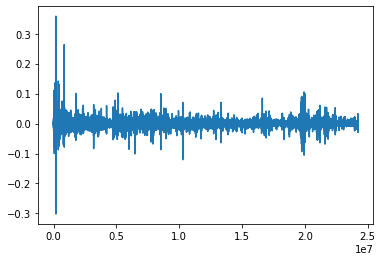

In [ ]:
(df[df['Asset_ID']==0]['Target']).plot()

In [ ]:
df = pd.concat([df,dft])
df.head()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,datetime
0,1514764860,2,40.0,2376.5800,2399.5000,2357.1400,2374.5900,19.233005,2373.116392,-0.004218,2018-01-01 00:01:00
1,1514764860,0,5.0,8.5300,8.5300,8.5300,8.5300,78.380000,8.530000,-0.014399,2018-01-01 00:01:00
2,1514764860,1,229.0,13835.1940,14013.8000,13666.1100,13850.1760,31.550062,13827.062093,-0.014643,2018-01-01 00:01:00
3,1514764860,5,32.0,7.6596,7.6596,7.6567,7.6576,6626.713370,7.657713,-0.013922,2018-01-01 00:01:00
4,1514764860,7,5.0,25.9200,25.9200,25.8740,25.8770,121.087310,25.891363,-0.008264,2018-01-01 00:01:00


In [ ]:
btc = df[df['Asset_ID']==1].set_index("timestamp") #Bitcoin
eth = df[df['Asset_ID']==6].set_index("timestamp")#Ethereum
#car = df[df['Asset_ID']==3].set_index("timestamp") # Cardano
#binc = df[df['Asset_ID']==0].set_index("timestamp") # Binance Coin
#doge = df[df['Asset_ID']==4].set_index("timestamp") #Dogecoin
#btcc = df[df['Asset_ID']==2].set_index("timestamp") #Bitcoin Cash
#lit = df[df['Asset_ID']==9].set_index("timestamp") #Litecoin
#ethcl = df[df['Asset_ID']==7].set_index("timestamp") #Ethereum CLassic
#stl = df[df['Asset_ID']==12].set_index("timestamp") #Stellar
#tro = df[df['Asset_ID']==13].set_index("timestamp") #TRON
#mon = df[df['Asset_ID']==11].set_index("timestamp") #Monero
#eos = df[df['Asset_ID']==5].set_index("timestamp") #EOS.IO
#iot = df[df['Asset_ID']==8].set_index("timestamp") #IOTA
#mak = df[df['Asset_ID']==10].set_index("timestamp") #Maker

# Missing Values Chceking

In [ ]:
print((btc.index[1:]-btc.index[:-1]).value_counts().head())
print((eth.index[1:]-eth.index[:-1]).value_counts().head())
print((car.index[1:]-car.index[:-1]).value_counts().head())
print((binc.index[1:]-binc.index[:-1]).value_counts().head())
print((doge.index[1:]-doge.index[:-1]).value_counts().head())
print((btcc.index[1:]-btcc.index[:-1]).value_counts().head())
print((lit.index[1:]-lit.index[:-1]).value_counts().head())
print((ethcl.index[1:]-ethcl.index[:-1]).value_counts().head())
print((stl.index[1:]-stl.index[:-1]).value_counts().head())
print((tro.index[1:]-tro.index[:-1]).value_counts().head())
print((mon.index[1:]-mon.index[:-1]).value_counts().head())
print((eos.index[1:]-eos.index[:-1]).value_counts().head())
print((iot.index[1:]-iot.index[:-1]).value_counts().head())
print((mak.index[1:]-mak.index[:-1]).value_counts().head())

60     1956136
120         78
180         12
240         11
420          9
Name: timestamp, dtype: int64
60     1956043
120        100
180         23
300          5
540          4
Name: timestamp, dtype: int64
60     1782506
120       7848
180       1090
240        270
300         79
Name: timestamp, dtype: int64
60     1936018
120       5774
180        510
240        117
300         50
Name: timestamp, dtype: int64
60     1080213
120      51442
180      13708
240       5575
300       2627
Name: timestamp, dtype: int64
60     1951034
120       2176
180        196
240         45
300         29
Name: timestamp, dtype: int64
60     1955738
120        199
180         33
240         14
300          8
Name: timestamp, dtype: int64
60     1946419
120       4229
180        319
240         75
300         27
Name: timestamp, dtype: int64
60     1740978
120      18156
180       6734
240       3830
300       2805
Name: timestamp, dtype: int64
60     1862334
120       6204
180       2576
240       

Has missing values in time periods for all cryptos

# Imputing Missing Values

In [ ]:
btc = btc.reindex(range(btc.index[0],btc.index[-1]+60,60),method='pad')
eth = eth.reindex(range(eth.index[0],eth.index[-1]+60,60),method='pad')
#car = car.reindex(range(car.index[0],car.index[-1]+60,60),method='pad')
#binc = binc.reindex(range(binc.index[0],binc.index[-1]+60,60),method='pad')
#doge = doge.reindex(range(doge.index[0],doge.index[-1]+60,60),method='pad')
#btcc = btcc.reindex(range(btcc.index[0],btcc.index[-1]+60,60),method='pad')
#lit = lit.reindex(range(lit.index[0],lit.index[-1]+60,60),method='pad')
#ethcl = ethcl.reindex(range(ethcl.index[0],ethcl.index[-1]+60,60),method='pad')
#stl = stl.reindex(range(stl.index[0],stl.index[-1]+60,60),method='pad')
#tro = tro.reindex(range(tro.index[0],tro.index[-1]+60,60),method='pad')
#mon = mon.reindex(range(mon.index[0],mon.index[-1]+60,60),method='pad')
#eos = eos.reindex(range(eos.index[0],eos.index[-1]+60,60),method='pad')
#iot = iot.reindex(range(iot.index[0],iot.index[-1]+60,60),method='pad')
#mak = mak.reindex(range(mak.index[0],mak.index[-1]+60,60),method='pad')

In [ ]:
f = plt.figure(figsize=(14,8))

ax = f.add_subplot(721)
plt.plot(btc['Close'],color='red', label='BTC')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Bitcoin')

ax2 = f.add_subplot(722)
ax2.plot(eth['Close'], color='red', label='ETH')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Ethereum')

ax3 = f.add_subplot(723)
ax3.plot(car['Close'], color='red', label='CAR')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Cardano')

ax4 = f.add_subplot(724)
ax4.plot(binc['Close'], color='red', label='BINC')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Binance Coin')

ax5 = f.add_subplot(725)
ax5.plot(doge['Close'], color='red', label='DOGE')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Dogecoin')

ax6 = f.add_subplot(726)
ax6.plot(btcc['Close'], color='red', label='BTCC')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Bitcoin Cash')

ax7 = f.add_subplot(727)
ax7.plot(lit['Close'], color='red', label='LIT')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Litecoin')

ax8 = f.add_subplot(728)
ax8.plot(ethcl['Close'], color='red', label='ETHCL')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Ethereum Classic')

ax9 = f.add_subplot(729)
ax9.plot(stl['Close'], color='red', label='STL')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Stellar')

ax10 = f.add_subplot(7,2,10)
ax10.plot(tro['Close'], color='red', label='TRO')
plt.legend()
plt.xlabel('Time')
plt.ylabel('TRON')

ax11 = f.add_subplot(7,2,11)
ax11.plot(mon['Close'], color='red', label='MON')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Monero')

ax12 = f.add_subplot(7,2,12)
ax12.plot(eos['Close'], color='red', label='EOS')
plt.legend()
plt.xlabel('Time')
plt.ylabel('EOS.IO')

ax13 = f.add_subplot(7,2,13)
ax13.plot(iot['Close'], color='red', label='IOT')
plt.legend()
plt.xlabel('Time')
plt.ylabel('IOTA')

ax14 = f.add_subplot(7,2,14)
ax14.plot(mak['Close'], color='red', label='MAK')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Maker')

plt.tight_layout()
plt.show()

All have different patterns.
LIT, STL, MON, are little bit similar
BTC, MAK, BINC, ETH are similar
Rest are diff

So, starting with only BTC & ETH

# Feature Engg

In [ ]:
def upper_shadow(df):
    return df["High"] - np.maximum(df["Close"], df["Open"])

def lower_shadow(df):
    return np.minimum(df["Close"], df["Open"]) - df["Low"]

def log_return(series, periods=1):
    return np.log(series).diff(periods=periods)

#exponential Moving Average
def EMA1(df, colname,n):
    a= 2/(n+1)
    return df[colname].ewm(alpha=a).mean()

#MACD is a technical indicator that helps to understand if it is a bullish or bearish market. That is, it can help the investor to understand if he should buy or sell the stock.
def MACD(df, colname, span1=12, span2=26, span3=9):
    exp1 = EMA1(df, colname, span1)
    exp2 = EMA1(df, colname, span2)
    macd = 100 * (exp1 - exp2) / exp2
    signal = macd.ewm(alpha=2./(span3+1)).mean() ##EMA1(df, colname, macd, span3)
    return macd, signal

In [ ]:
def create_features(df):
  df["High-Low"] = df["High"] - df["Low"]
  df["Close-Open"] = df["Close"] - df["Open"]
  df['log_high/low'] = np.log(df.High / df.Low)
  df['hour'] = df['datetime'].dt.hour
  df['dayofweek'] = df['datetime'].dt.dayofweek
  df['month'] = df['datetime'].dt.month
  df['year'] = df['datetime'].dt.year
  df['log_return_VWAP_15'] = log_return(df['VWAP'],periods=15)
  df['log_return_VWAP_5'] = log_return(df['VWAP'],periods=5)
  df['log_return_VWAP_1'] = log_return(df['VWAP'],periods=1)
  df['Up_Shadow'] = upper_shadow(df)
  df['lo_Shadow'] = lower_shadow(df)
  macd, signal = MACD(df, colname="Close")
  df['MACD_' + "Close" + '_macd'] = macd
  df['MACD_' + "Close" + '_signal'] = signal
  df['MACD_' + "Close" + '_macd'] = df['MACD_' + "Close" + '_macd'].astype(np.float32)
  df['MACD_' + "Close" + '_signal'] = df['MACD_' + "Close" + '_signal'].astype(np.float32)
  return df

# Relation

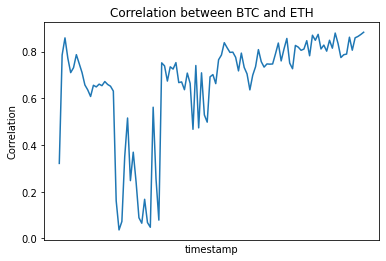

In [ ]:
btc_long = log_return(btc.Close)[1:]
eth_long = log_return(eth.Close)[1:]
btc_long.rename('lret_btc', inplace=True)
eth_long.rename('lret_eth', inplace=True)
assets = pd.concat([btc_long, eth_long], axis=1)
cor = assets.groupby(assets.index//(20000*60)).corr().loc[:,"lret_btc"].loc[:,"lret_eth"]
cor.plot()
plt.xticks([])
plt.ylabel("Correlation")
plt.title("Correlation between BTC and ETH")
plt.show()

# BTC

Text(0, 0.5, 'Bitcoin')

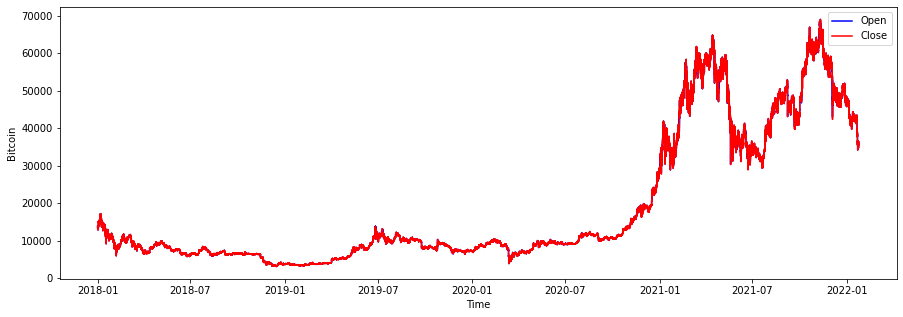

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(btc['datetime'],btc['Open'],color='blue', label='Open')
plt.plot(btc['datetime'],btc['Close'],color='red', label='Close')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Bitcoin')

Text(0, 0.5, 'Bitcoin')

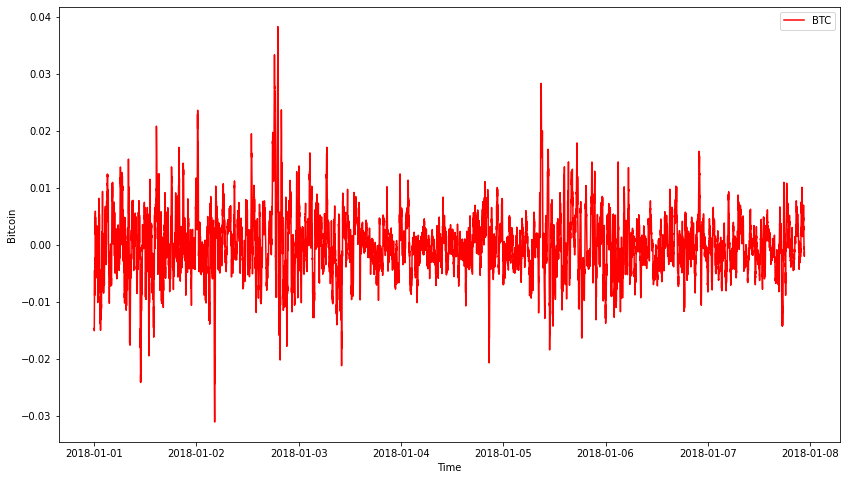

In [ ]:
plt.figure(figsize=(14,8))
plt.plot(btc['datetime'][:10000],btc['Target'][:10000],color='red', label='BTC')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Bitcoin')

In [ ]:
btc1 = create_features(btc)

In [ ]:
btc1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2136960 entries, 1514764860 to 1642982400
Data columns (total 24 columns):
 #   Column              Dtype         
---  ------              -----         
 0   Asset_ID            int64         
 1   Count               float64       
 2   Open                float64       
 3   High                float64       
 4   Low                 float64       
 5   Close               float64       
 6   Volume              float64       
 7   VWAP                float64       
 8   Target              float64       
 9   datetime            datetime64[ns]
 10  High-Low            float64       
 11  Close-Open          float64       
 12  log_high/low        float64       
 13  hour                int64         
 14  dayofweek           int64         
 15  month               int64         
 16  year                int64         
 17  log_return_VWAP_15  float64       
 18  log_return_VWAP_5   float64       
 19  log_return_VWAP_1   float64   

In [ ]:
btc2 = btc1.reset_index()

In [ ]:
btc2['Target'] = btc2['Target'].fillna(0)

In [ ]:
X_train = btc2[btc2['datetime']< '2021-07-24 00:00:00']
y_train = btc2[btc2['datetime']< '2021-07-24 00:00:00']['Target'].to_numpy()
X_val = btc2[btc2['datetime']>= '2021-07-24 00:00:00']
y_val = btc2[btc2['datetime']>= '2021-07-24 00:00:00']['Target'].to_numpy()

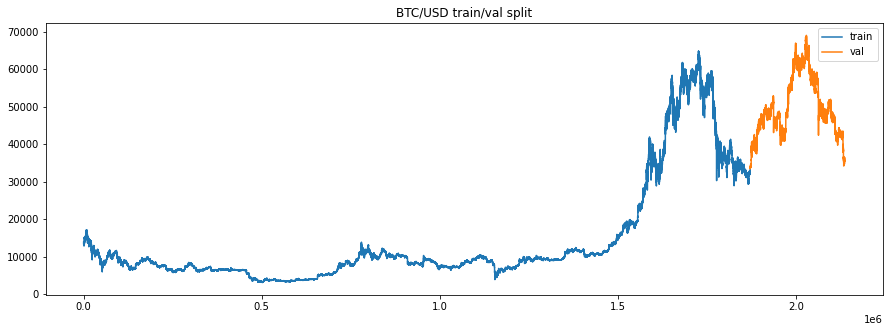

In [ ]:
btc2[btc2['datetime']< '2021-07-24 00:00:00']["Close"].plot(figsize=(15, 5), label='train',  title='BTC/USD train/val split')
btc2[btc2['datetime']>= '2021-07-24 00:00:00']["Close"].plot(label='val')
plt.legend()

In [ ]:
X_train = X_train.fillna(0)
x_val = X_val.fillna(0)

In [ ]:
X_train1 = X_train.drop(['timestamp', "Target",'datetime', 'Asset_ID'], axis=1).to_numpy()
X_val1 = X_val.drop(['timestamp', "Target",'datetime', 'Asset_ID'], axis=1).to_numpy()

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train1)
X_val_scaled = scaler.transform(X_val1)

# Model1 - Linear Regression

In [ ]:
reg = LinearRegression()
reg.fit(X_train_scaled, y_train)
y_pred = reg.predict(X_val_scaled)

In [ ]:
RMSE = math.sqrt(mean_squared_error(y_val, y_pred))
print("RMSE:", RMSE)

RMSE: 0.0015761623280763266


# Model2 - Light GBM

In [ ]:
lgb_model = LGBMRegressor(n_estimators = 100,
                          max_depth = 10,
                          learning_rate = 0.1,
                          seed = 28)

In [ ]:
lgb_model.fit(X_train_scaled, y_train)
y_pred1 = lgb_model.predict(X_val_scaled)

In [ ]:
MSE = mean_squared_error(y_val, y_pred1)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.0015937797964813828


In [ ]:
##Hyper parameter Tuning
lgb= LGBMRegressor()
parameters ={'max_depth': [10],
             'n_estimators': [50],
             #'num_leaves': range(30,150,20),
             'learning_rate': [0.005],
               }

In [ ]:
clf=GridSearchCV(lgb,param_grid=parameters,scoring='accuracy',cv=5,n_jobs = -1,verbose=True)
clf.fit(X_train_scaled,y_train)
print(clf.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


{'learning_rate': 0.005, 'max_depth': 10, 'n_estimators': 200}


In [ ]:
lgb_model1 = LGBMRegressor(n_estimators = 200,
                          max_depth = 10,
                          learning_rate = 0.005,
                          seed = 28)

In [ ]:
lgb_model1.fit(X_train_scaled, y_train)
y_pred1 = lgb_model1.predict(X_val_scaled)

In [ ]:
MSE = mean_squared_error(y_val, y_pred1)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.0018359744373571136


In [ ]:
##Hyper parameter Tuning
lgb= LGBMRegressor()
parameters ={'max_depth': [10],
             'n_estimators': range(200,800,200),
             #'num_leaves': range(30,150,20),
             'learning_rate': [0.005],
             'bagging_fraction':[0.8]
               }

In [ ]:
clf=GridSearchCV(lgb,param_grid=parameters,scoring='accuracy',cv=5,n_jobs = -1,verbose=True)
clf.fit(X_train_scaled,y_train)
print(clf.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


{'bagging_fraction': 0.8, 'learning_rate': 0.005, 'max_depth': 10, 'n_estimators': 200}


In [ ]:
lgb_model2 = LGBMRegressor(n_estimators = 400,
                          max_depth = 15,
                          learning_rate = 0.005,
                          bagging_fraction= 0.8,
                           subsample = 0.8,
                           colsample_bytree=0.7,
                          seed = 28)

In [ ]:
lgb_model2.fit(X_train_scaled, y_train)
y_pred2 = lgb_model2.predict(X_val_scaled)

In [ ]:
MSE = mean_squared_error(y_val, y_pred2)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.0018383834758303585


In [ ]:
##Hyper parameter Tuning
lgb= LGBMRegressor()
parameters ={'max_depth': [10,15],
             'n_estimators': [400],
             'num_leaves': range(20,50,10),
             'learning_rate': [0.005],
             'subsample' : [0.8],
            'colsample_bytree': [0.7],
             
               }

In [ ]:
clf=GridSearchCV(lgb,param_grid=parameters,scoring='accuracy',cv=5,n_jobs = -1,verbose=True)
clf.fit(X_train_scaled,y_train)
print(clf.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(


{'colsample_bytree': 0.7, 'learning_rate': 0.005, 'max_depth': 10, 'n_estimators': 400, 'num_leaves': 20, 'subsample': 0.8}


In [ ]:
##Final Model
lgb_model3 = LGBMRegressor(n_estimators = 50,
                          max_depth = 10,
                          learning_rate = 0.005,
                           num_leaves = 20,
                          bagging_fraction= 0.8,
                           subsample = 0.8,
                           colsample_bytree=0.7,
                          seed = 28)
#1234

In [ ]:
lgb_model3.fit(X_train_scaled, y_train)
y_pred2 = lgb_model3.predict(X_val_scaled)

In [ ]:
MSE = mean_squared_error(y_val, y_pred2)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.0015784262899180578


# Model 3 - Exponential Smoothing

In [ ]:
btc_ts = btc2[['datetime','Target']]

In [ ]:
btc_train_ts = btc_ts[btc_ts['datetime']< '2021-07-24 00:00:00']
btc_val_ts = btc_ts[btc_ts['datetime']>= '2021-07-24 00:00:00']

In [ ]:
btc_train_ts = btc_train_ts.set_index('datetime')
btc_val_ts = btc_val_ts.set_index('datetime')

In [ ]:
ses = SimpleExpSmoothing(np.asarray(btc_train_ts['Target']))
model1 = ses.fit(smoothing_level = 0.2, optimized = False)
model2 = ses.fit(smoothing_level = 0.5, optimized = False)
pred1 = model1.forecast(264961)
pred2 = model2.forecast(264961)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


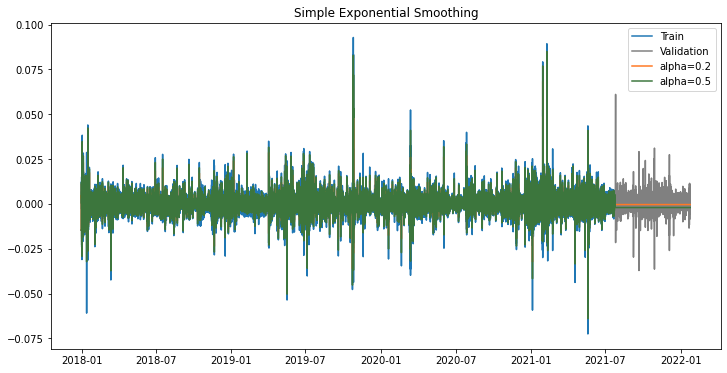

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(btc_train_ts.index, btc_train_ts.values, label ='Train')
ax.plot(btc_val_ts.index, btc_val_ts.values, color="gray", label="Validation")
for p, f, c in zip((pred1, pred2),(model1,model2),('#ff7823','#3c763d')):
    ax.plot(btc_train_ts.index, f.fittedvalues, color=c)
    ax.plot(btc_val_ts.index, p, label="alpha="+str(f.params['smoothing_level']), color=c)
plt.title("Simple Exponential Smoothing")    
plt.legend();

In [ ]:
MSE1 = mean_squared_error(np.asarray(btc_val_ts.values), pred1)
RMSE1 = math.sqrt(MSE1)
MSE2 = mean_squared_error(np.asarray(btc_val_ts.values), pred2)
RMSE2 = math.sqrt(MSE2)
print("RMSE1:", RMSE1)
print("RMSE2:", RMSE2)

RMSE1: 0.0016248004190025386
RMSE2: 0.0025944357615971603


# Model 4 - XG Boost

In [ ]:
xgb_model = XGBRegressor(n_estimators = 500,
                          max_depth = 10,
                          learning_rate = 0.05, 
                          colsample_bytree=0.4,
                          seed = 28)

In [ ]:
xgb_model.fit(X_train_scaled, y_train)
y_pred4 = xgb_model.predict(X_val_scaled)

In [ ]:
RMSE = math.sqrt(mean_squared_error(y_pred4,y_val))
print("RMSE:", RMSE)

0.00194031878478275


# Model 5- LSTM

In [ ]:
class sample_generator(keras.utils.Sequence):
    def __init__(self, x_set, y_set, batch_size, length):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size
        self.length = length
        self.size = len(x_set)

    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))

    def __getitem__(self, idx):
        batch_x=[]
        batch_y=[]
        for i in range(self.batch_size):
            start_ind = self.batch_size*idx + i
            end_ind = start_ind + self.length 
            if end_ind <= self.size:
                batch_x.append(self.x[start_ind : end_ind])
                batch_y.append(self.y[end_ind -1])

        return np.array(batch_x), np.array(batch_y)

In [ ]:
BATCH_SIZE=2**10
train_window = sample_generator(X_train_scaled, y_train, length=15, batch_size=BATCH_SIZE)
val_window = sample_generator(X_val_scaled, y_val, length=15, batch_size=BATCH_SIZE)

In [ ]:
train_window[0][0].shape[0]

1024

In [ ]:
from keras.layers.rnn import lstm_v1
def build_lstm_model():
    lstm = Sequential()
    lstm.add(LSTM(32,return_sequences=True,input_shape=(train_window[0][0].shape[1],train_window[0][0].shape[-1])))
    lstm.add(layers.BatchNormalization())
    lstm.add(Dropout(0.2))

    #lstm.add(LSTM(32,return_sequences=False))
    #lstm.add(layers.BatchNormalization())
    #lstm.add(Dropout(0.2))

    lstm.add(Dense(64))
    lstm.add(Dropout(0.1))
    lstm.add(Dense(1))
    return lstm

In [ ]:
lstm_model = build_lstm_model()
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 32)            6912      
                                                                 
 batch_normalization (BatchN  (None, 15, 32)           128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 15, 32)            0         
                                                                 
 dense (Dense)               (None, 15, 64)            2112      
                                                                 
 dropout_1 (Dropout)         (None, 15, 64)            0         
                                                                 
 dense_1 (Dense)             (None, 15, 1)             65        
                                                        

In [ ]:
optimizer = keras.optimizers.Adam(0.0005)
lstm_model.compile(loss='mse', optimizer='adam',metrics=['mse'])

In [ ]:
# Display training progress by printing a single dot for each completed epoch
tf.random.set_seed(14)
class PrintLoss(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        # calculate training time
        t = time.monotonic() - self.time
        print('| Epoch {:2} | training time {:6.2f}s | train loss {:6.2f} | validation loss {:6.2f}'
              .format(epoch, t, logs['loss'], logs['val_loss']))
        
    def on_epoch_begin(self, epoch, logs):
        if epoch == 0: self.time = time.monotonic()

EPOCHS = 5
BATCH = 2048

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=1)
history = lstm_model.fit(train_window, batch_size=BATCH,
                              epochs=EPOCHS, verbose=1, validation_data = (val_window),
                              callbacks=[early_stop])

Epoch 1/5
1829/1829 [==============================] - 491s 264ms/step - loss: 0.0217 - mse: 0.0217 - val_loss: 1.3724e-05 - val_mse: 1.3724e-05
Epoch 2/5
1829/1829 [==============================] - 498s 272ms/step - loss: 2.1880e-04 - mse: 2.1880e-04 - val_loss: 2.8830e-06 - val_mse: 2.8830e-06
Epoch 3/5
1829/1829 [==============================] - 480s 262ms/step - loss: 8.1226e-06 - mse: 8.1226e-06 - val_loss: 2.9111e-06 - val_mse: 2.9111e-06


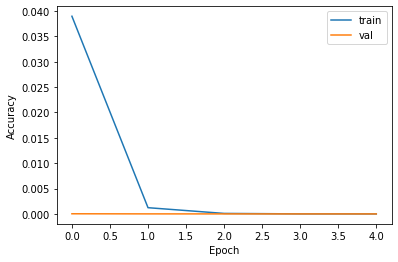

In [ ]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    hist.tail()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['mse'], label="train")
    plt.plot(hist['epoch'], hist['val_mse'], label="val")
    plt.legend()
    plt.show()
plot_history(history)

In [ ]:
predictions = lstm_model.predict(val_window)
predictions.shape

259/259 [==============================] - 12s 42ms/step


(264947, 15, 1)

In [ ]:
y_true_val = np.squeeze(y_val[14:])
y_true_val.shape

(264947,)

In [ ]:
RMSE = math.sqrt(mean_squared_error(y_true_val, predictions[:,1]))
print("RMSE:", RMSE)

RMSE: 0.0017129695645881082


# Model 6- LSTM1 - BEST

In [ ]:
class sample_generator(keras.utils.Sequence):
    def __init__(self, x_set, y_set, batch_size, length):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size
        self.length = length
        self.size = len(x_set)

    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))

    def __getitem__(self, idx):
        batch_x=[]
        batch_y=[]
        for i in range(self.batch_size):
            start_ind = self.batch_size*idx + i
            end_ind = start_ind + self.length 
            if end_ind <= self.size:
                batch_x.append(self.x[start_ind : end_ind])
                batch_y.append(self.y[end_ind -1])

        return np.array(batch_x), np.array(batch_y)

In [ ]:
BATCH_SIZE=2**10
train_window = sample_generator(X_train_scaled, y_train, length=15, batch_size=BATCH_SIZE)
val_window = sample_generator(X_val_scaled, y_val, length=15, batch_size=BATCH_SIZE)

In [ ]:
train_window[0][0].shape[0]

1024

In [ ]:
from keras.layers.rnn import lstm_v1
def build_lstm_model():
    lstm = Sequential()
    lstm.add(LSTM(32,return_sequences=True,input_shape=(train_window[0][0].shape[1],train_window[0][0].shape[-1])))
    lstm.add(layers.BatchNormalization())
    lstm.add(Dropout(0.2))

    lstm.add(LSTM(32,return_sequences=False))
    lstm.add(layers.BatchNormalization())
    lstm.add(Dropout(0.2))

    #lstm.add(Dense(128))
    lstm.add(Dropout(0.2))
    lstm.add(Dense(1))
    return lstm

In [ ]:
lstm_model = build_lstm_model()
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 32)            6912      
                                                                 
 batch_normalization (BatchN  (None, 15, 32)           128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 15, 32)            0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 32)                0

In [ ]:
optimizer = keras.optimizers.Adam(0.0005)
lstm_model.compile(loss='mse', optimizer='adam',metrics=['mse'])

In [ ]:
# Display training progress by printing a single dot for each completed epoch
tf.random.set_seed(14)
class PrintLoss(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        # calculate training time
        t = time.monotonic() - self.time
        print('| Epoch {:2} | training time {:6.2f}s | train loss {:6.2f} | validation loss {:6.2f}'
              .format(epoch, t, logs['loss'], logs['val_loss']))
        
    def on_epoch_begin(self, epoch, logs):
        if epoch == 0: self.time = time.monotonic()

EPOCHS = 5
BATCH = 1024

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=1)
history = lstm_model.fit(train_window, batch_size=BATCH,
                              epochs=EPOCHS, verbose=1, validation_data = (val_window),
                              callbacks=[early_stop])

Epoch 1/5
1829/1829 [==============================] - 299s 160ms/step - loss: 0.1374 - mse: 0.1374 - val_loss: 2.5911e-06 - val_mse: 2.5911e-06
Epoch 2/5
1829/1829 [==============================] - 293s 160ms/step - loss: 4.1800e-06 - mse: 4.1800e-06 - val_loss: 2.4962e-06 - val_mse: 2.4962e-06
Epoch 3/5
1829/1829 [==============================] - 293s 160ms/step - loss: 4.2021e-06 - mse: 4.2021e-06 - val_loss: 2.5110e-06 - val_mse: 2.5110e-06


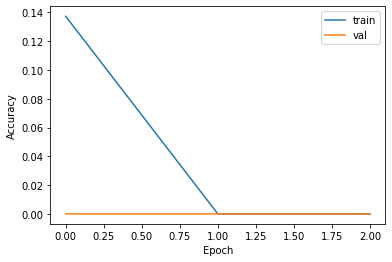

In [ ]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    hist.tail()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['mse'], label="train")
    plt.plot(hist['epoch'], hist['val_mse'], label="val")
    plt.legend()
    plt.show()
plot_history(history)

In [ ]:
predictions = lstm_model.predict(val_window)
predictions.shape

259/259 [==============================] - 23s 80ms/step


(264947, 1)

In [ ]:
y_true_val = np.squeeze(y_val[14:])
y_true_val.shape

(264947,)

In [ ]:
RMSE = math.sqrt(mean_squared_error(y_true_val, predictions))
print("RMSE:", RMSE)

RMSE: 0.0015846170216166347


# Model 7- LSTM2

In [ ]:
class sample_generator(keras.utils.Sequence):
    def __init__(self, x_set, y_set, batch_size, length):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size
        self.length = length
        self.size = len(x_set)

    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))

    def __getitem__(self, idx):
        batch_x=[]
        batch_y=[]
        for i in range(self.batch_size):
            start_ind = self.batch_size*idx + i
            end_ind = start_ind + self.length 
            if end_ind <= self.size:
                batch_x.append(self.x[start_ind : end_ind])
                batch_y.append(self.y[end_ind -1])

        return np.array(batch_x), np.array(batch_y)

In [ ]:
BATCH_SIZE=2**10
train_window = sample_generator(X_train_scaled, y_train, length=15, batch_size=BATCH_SIZE)
val_window = sample_generator(X_val_scaled, y_val, length=15, batch_size=BATCH_SIZE)

In [ ]:
train_window[0][0].shape[0]

1024

In [ ]:
from keras.layers.rnn import lstm_v1
def build_lstm_model():
    lstm = Sequential()
    lstm.add(LSTM(32,return_sequences=True,input_shape=(train_window[0][0].shape[1],train_window[0][0].shape[-1])))
    lstm.add(layers.BatchNormalization())
    lstm.add(Dropout(0.2))

    lstm.add(LSTM(32,return_sequences=False))
    lstm.add(layers.BatchNormalization())
    lstm.add(Dropout(0.2))

    #lstm.add(Dense(128))
    #lstm.add(Dropout(0.2))
    lstm.add(Dense(1))
    return lstm

In [ ]:
lstm_model = build_lstm_model()
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 32)            6912      
                                                                 
 batch_normalization (BatchN  (None, 15, 32)           128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 15, 32)            0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 32)                0

In [ ]:
optimizer = keras.optimizers.Adam(0.0005)
lstm_model.compile(loss='mse', optimizer='adam',metrics=['mse'])

In [ ]:
# Display training progress by printing a single dot for each completed epoch
tf.random.set_seed(14)
class PrintLoss(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        # calculate training time
        t = time.monotonic() - self.time
        print('| Epoch {:2} | training time {:6.2f}s | train loss {:6.2f} | validation loss {:6.2f}'
              .format(epoch, t, logs['loss'], logs['val_loss']))
        
    def on_epoch_begin(self, epoch, logs):
        if epoch == 0: self.time = time.monotonic()

EPOCHS = 5
BATCH = 512

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=1)
history = lstm_model.fit(train_window, batch_size=BATCH,
                              epochs=EPOCHS, verbose=1, validation_data = (val_window),
                              callbacks=[early_stop])

Epoch 1/5
1625/1625 [==============================] - 294s 177ms/step - loss: 0.0915 - mse: 0.0915 - val_loss: 3.8263e-05 - val_mse: 3.8263e-05
Epoch 2/5
1625/1625 [==============================] - 284s 175ms/step - loss: 8.4344e-06 - mse: 8.4344e-06 - val_loss: 3.4392e-06 - val_mse: 3.4392e-06
Epoch 3/5
1625/1625 [==============================] - 291s 179ms/step - loss: 4.1762e-06 - mse: 4.1762e-06 - val_loss: 3.3744e-06 - val_mse: 3.3744e-06
Epoch 4/5
1625/1625 [==============================] - 297s 183ms/step - loss: 4.2753e-06 - mse: 4.2753e-06 - val_loss: 3.4194e-06 - val_mse: 3.4194e-06


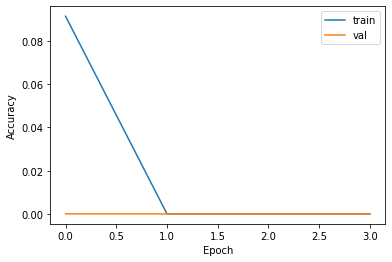

In [ ]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    hist.tail()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['mse'], label="train")
    plt.plot(hist['epoch'], hist['val_mse'], label="val")
    plt.legend()
    plt.show()
plot_history(history)

In [ ]:
predictions = lstm_model.predict(val_window)
predictions.shape

463/463 [==============================] - 34s 71ms/step


(473746, 1)

In [ ]:
y_true_val = np.squeeze(y_val[14:])
y_true_val.shape

(473746,)

In [ ]:
RMSE = math.sqrt(mean_squared_error(y_true_val, predictions))
print("RMSE:", RMSE)

RMSE: 0.001849163758985542


# Model 8- LSTM3

In [ ]:
class sample_generator(keras.utils.Sequence):
    def __init__(self, x_set, y_set, batch_size, length):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size
        self.length = length
        self.size = len(x_set)

    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))

    def __getitem__(self, idx):
        batch_x=[]
        batch_y=[]
        for i in range(self.batch_size):
            start_ind = self.batch_size*idx + i
            end_ind = start_ind + self.length 
            if end_ind <= self.size:
                batch_x.append(self.x[start_ind : end_ind])
                batch_y.append(self.y[end_ind -1])

        return np.array(batch_x), np.array(batch_y)

In [ ]:
BATCH_SIZE=2**10
train_window = sample_generator(X_train_scaled, y_train, length=15, batch_size=BATCH_SIZE)
val_window = sample_generator(X_val_scaled, y_val, length=15, batch_size=BATCH_SIZE)

In [ ]:
train_window[0][0].shape[0]

1024

In [ ]:
from keras.layers.rnn import lstm_v1
def build_lstm_model():
    lstm = Sequential()
    lstm.add(LSTM(32,return_sequences=True,input_shape=(train_window[0][0].shape[1],train_window[0][0].shape[-1])))
    lstm.add(layers.BatchNormalization())
    lstm.add(Dropout(0.2))

    lstm.add(LSTM(16,return_sequences=True))
    lstm.add(layers.BatchNormalization())
    lstm.add(Dropout(0.2))

    lstm.add(LSTM(16,return_sequences=False))
    lstm.add(layers.BatchNormalization())
    lstm.add(Dropout(0.2))

    #lstm.add(Dense(128))
    lstm.add(Dropout(0.2))
    lstm.add(Dense(1))
    return lstm

In [ ]:
lstm_model = build_lstm_model()
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 32)            6912      
                                                                 
 batch_normalization (BatchN  (None, 15, 32)           128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 15, 32)            0         
                                                                 
 lstm_1 (LSTM)               (None, 15, 16)            3136      
                                                                 
 batch_normalization_1 (Batc  (None, 15, 16)           64        
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 15, 16)            0

In [ ]:
optimizer = keras.optimizers.Adam(0.0005)
lstm_model.compile(loss='mse', optimizer='adam',metrics=['mse'])

In [ ]:
# Display training progress by printing a single dot for each completed epoch
tf.random.set_seed(14)
class PrintLoss(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        # calculate training time
        t = time.monotonic() - self.time
        print('| Epoch {:2} | training time {:6.2f}s | train loss {:6.2f} | validation loss {:6.2f}'
              .format(epoch, t, logs['loss'], logs['val_loss']))
        
    def on_epoch_begin(self, epoch, logs):
        if epoch == 0: self.time = time.monotonic()

EPOCHS = 5
BATCH = 1024

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=1)
history = lstm_model.fit(train_window, batch_size=BATCH,
                              epochs=EPOCHS, verbose=1, validation_data = (val_window),
                              callbacks=[early_stop])

Epoch 1/5
1829/1829 [==============================] - 313s 167ms/step - loss: 0.1177 - mse: 0.1177 - val_loss: 1.8102e-05 - val_mse: 1.8102e-05
Epoch 2/5
1829/1829 [==============================] - 298s 163ms/step - loss: 1.4672e-05 - mse: 1.4672e-05 - val_loss: 2.4933e-06 - val_mse: 2.4933e-06
Epoch 3/5
1829/1829 [==============================] - 306s 167ms/step - loss: 4.1916e-06 - mse: 4.1916e-06 - val_loss: 2.5472e-06 - val_mse: 2.5472e-06


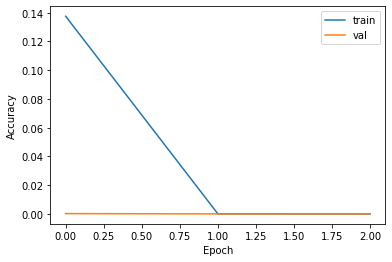

In [ ]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    hist.tail()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['mse'], label="train")
    plt.plot(hist['epoch'], hist['val_mse'], label="val")
    plt.legend()
    plt.show()
plot_history(history)

In [ ]:
predictions = lstm_model.predict(val_window)
predictions.shape

259/259 [==============================] - 18s 64ms/step


(264947, 1)

In [ ]:
y_true_val = np.squeeze(y_val[14:])
y_true_val.shape

(264947,)

In [ ]:
RMSE = math.sqrt(mean_squared_error(y_true_val, predictions))
print("RMSE:", RMSE)

RMSE: 0.0015959863578082628


# ETH

Text(0, 0.5, 'Ethereum')

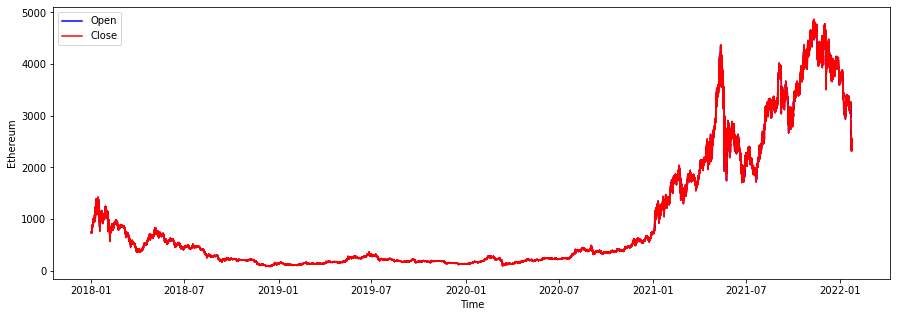

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(eth['datetime'],eth['Open'],color='blue', label='Open')
plt.plot(eth['datetime'],eth['Close'],color='red', label='Close')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Ethereum')

Text(0, 0.5, 'Ethereum')

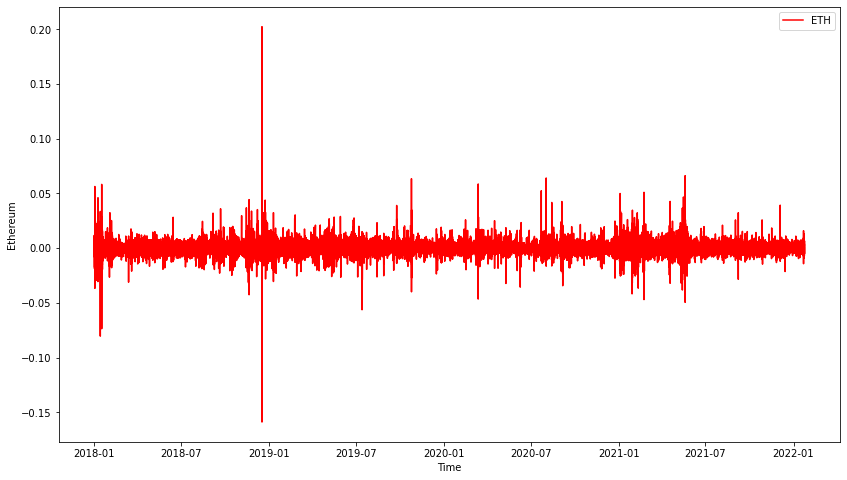

In [ ]:
plt.figure(figsize=(14,8))
plt.plot(eth['datetime'],eth['Target'],color='red', label='ETH')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Ethereum')

In [ ]:
eth1 = create_features(eth)

In [ ]:
eth2 = eth1.reset_index()

In [ ]:
eth2['Target'] = eth2['Target'].fillna(0)

In [ ]:
X_train = eth2[eth2['datetime']< '2021-07-24 00:00:00']
y_train = eth2[eth2['datetime']< '2021-07-24 00:00:00']['Target'].to_numpy()
X_val = eth2[eth2['datetime']>= '2021-07-24 00:00:00']
y_val = eth2[eth2['datetime']>= '2021-07-24 00:00:00']['Target'].to_numpy()

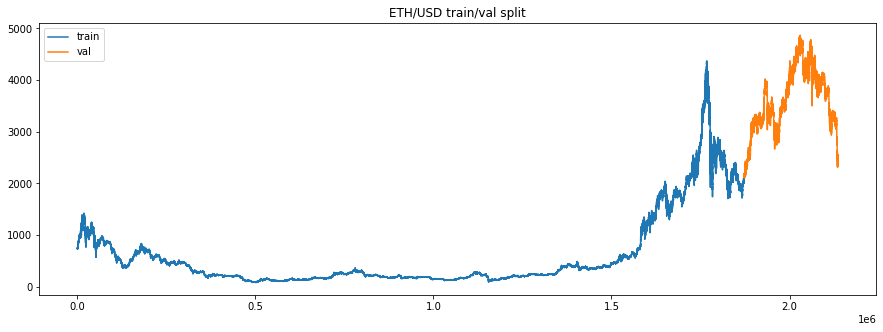

In [ ]:
eth2[eth2['datetime']< '2021-07-24 00:00:00']["Close"].plot(figsize=(15, 5), label='train',  title='ETH/USD train/val split')
eth2[eth2['datetime']>= '2021-07-24 00:00:00']["Close"].plot(label='val')
plt.legend()

In [ ]:
X_train = X_train.fillna(0)
x_val = X_val.fillna(0)

In [ ]:
X_train1 = X_train.drop(['timestamp', "Target",'datetime', 'Asset_ID'], axis=1).to_numpy()
X_val1 = X_val.drop(['timestamp', "Target",'datetime', 'Asset_ID'], axis=1).to_numpy()

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train1)
X_val_scaled = scaler.transform(X_val1)

# Model1 - Linear Regression

In [ ]:
reg = LinearRegression()
reg.fit(X_train_scaled, y_train)
y_pred = reg.predict(X_val_scaled)

In [ ]:
RMSE = math.sqrt(mean_squared_error(y_val, y_pred))
print("RMSE:", RMSE)

RMSE: 0.0017154314851575943


# Model2 - Light GBM

In [ ]:
lgb_model3 = LGBMRegressor(n_estimators = 100,
                          max_depth = 10,
                          learning_rate = 0.005,
                           num_leaves = 20,
                          bagging_fraction= 0.8,
                           subsample = 0.8,
                           colsample_bytree=0.7,
                          seed = 28)
#1234

In [ ]:
lgb_model3.fit(X_train_scaled, y_train)
y_pred2 = lgb_model3.predict(X_val_scaled)

In [ ]:
MSE = mean_squared_error(y_val, y_pred2)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.0017135264206134726


# Model 6- LSTM1 - BEST

In [ ]:
class sample_generator(keras.utils.Sequence):
    def __init__(self, x_set, y_set, batch_size, length):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size
        self.length = length
        self.size = len(x_set)

    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))

    def __getitem__(self, idx):
        batch_x=[]
        batch_y=[]
        for i in range(self.batch_size):
            start_ind = self.batch_size*idx + i
            end_ind = start_ind + self.length 
            if end_ind <= self.size:
                batch_x.append(self.x[start_ind : end_ind])
                batch_y.append(self.y[end_ind -1])

        return np.array(batch_x), np.array(batch_y)

In [ ]:
BATCH_SIZE=2**10
train_window = sample_generator(X_train_scaled, y_train, length=15, batch_size=BATCH_SIZE)
val_window = sample_generator(X_val_scaled, y_val, length=15, batch_size=BATCH_SIZE)

In [ ]:
train_window[0][0].shape[0]

1024

In [ ]:
from keras.layers.rnn import lstm_v1
def build_lstm_model():
    lstm = Sequential()
    lstm.add(LSTM(32,return_sequences=True,input_shape=(train_window[0][0].shape[1],train_window[0][0].shape[-1])))
    lstm.add(layers.BatchNormalization())
    lstm.add(Dropout(0.2))

    lstm.add(LSTM(32,return_sequences=False))
    lstm.add(layers.BatchNormalization())
    lstm.add(Dropout(0.2))

    #lstm.add(Dense(128))
    lstm.add(Dropout(0.2))
    lstm.add(Dense(1))
    return lstm

In [ ]:
lstm_model = build_lstm_model()
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 32)            6912      
                                                                 
 batch_normalization (BatchN  (None, 15, 32)           128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 15, 32)            0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 32)                0

In [ ]:
optimizer = keras.optimizers.Adam(0.0005)
lstm_model.compile(loss='mse', optimizer='adam',metrics=['mse'])

In [ ]:
# Display training progress by printing a single dot for each completed epoch
tf.random.set_seed(14)
class PrintLoss(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        # calculate training time
        t = time.monotonic() - self.time
        print('| Epoch {:2} | training time {:6.2f}s | train loss {:6.2f} | validation loss {:6.2f}'
              .format(epoch, t, logs['loss'], logs['val_loss']))
        
    def on_epoch_begin(self, epoch, logs):
        if epoch == 0: self.time = time.monotonic()

EPOCHS = 5
BATCH = 1024

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=1)
history = lstm_model.fit(train_window, batch_size=BATCH,
                              epochs=EPOCHS, verbose=1, validation_data = (val_window),
                              callbacks=[early_stop])

Epoch 1/5
1829/1829 [==============================] - 307s 164ms/step - loss: 0.1538 - mse: 0.1538 - val_loss: 4.6684e-06 - val_mse: 4.6684e-06
Epoch 2/5
1829/1829 [==============================] - 293s 160ms/step - loss: 6.4865e-06 - mse: 6.4865e-06 - val_loss: 3.0111e-06 - val_mse: 3.0111e-06
Epoch 3/5
1829/1829 [==============================] - 295s 161ms/step - loss: 6.4717e-06 - mse: 6.4717e-06 - val_loss: 3.0250e-06 - val_mse: 3.0250e-06


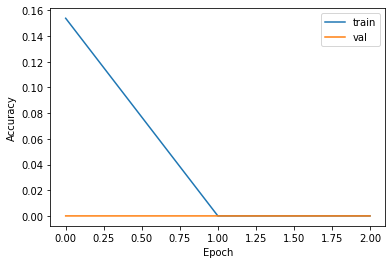

In [ ]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    hist.tail()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['mse'], label="train")
    plt.plot(hist['epoch'], hist['val_mse'], label="val")
    plt.legend()
    plt.show()
plot_history(history)

In [ ]:
predictions = lstm_model.predict(val_window)
predictions.shape

259/259 [==============================] - 20s 72ms/step


(264947, 1)

In [ ]:
y_true_val = np.squeeze(y_val[14:])
y_true_val.shape

(264947,)

In [ ]:
RMSE = math.sqrt(mean_squared_error(y_true_val, predictions))
print("RMSE:", RMSE)

RMSE: 0.0017392644521140874


# Model 3 - Exponential Smoothing

In [ ]:
eth_ts = eth2[['datetime','Target']]

In [ ]:
eth_train_ts = eth_ts[eth_ts['datetime']< '2021-07-24 00:00:00']
eth_val_ts = eth_ts[eth_ts['datetime']>= '2021-07-24 00:00:00']

In [ ]:
eth_train_ts = eth_train_ts.set_index('datetime')
eth_val_ts = eth_val_ts.set_index('datetime')

In [ ]:
ses = SimpleExpSmoothing(np.asarray(eth_train_ts['Target']))
model1 = ses.fit(smoothing_level = 0.2, optimized = False)
model2 = ses.fit(smoothing_level = 0.5, optimized = False)
pred1 = model1.forecast(264961)
pred2 = model2.forecast(264961)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


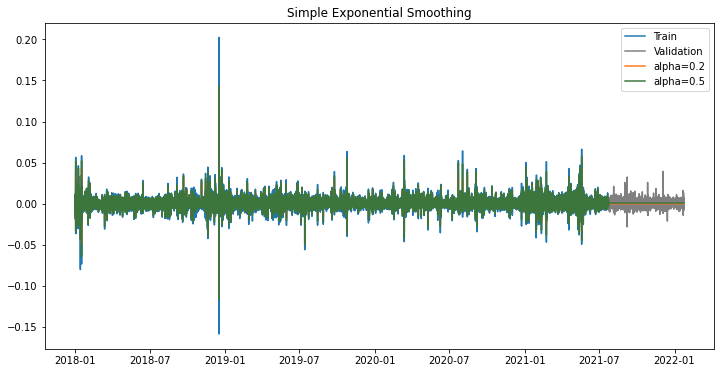

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(eth_train_ts.index, eth_train_ts.values, label ='Train')
ax.plot(eth_val_ts.index, eth_val_ts.values, color="gray", label="Validation")
for p, f, c in zip((pred1, pred2),(model1,model2),('#ff7823','#3c763d')):
    ax.plot(eth_train_ts.index, f.fittedvalues, color=c)
    ax.plot(eth_val_ts.index, p, label="alpha="+str(f.params['smoothing_level']), color=c)
plt.title("Simple Exponential Smoothing")    
plt.legend();

In [ ]:
MSE1 = mean_squared_error(np.asarray(eth_val_ts.values), pred1)
RMSE1 = math.sqrt(MSE1)
MSE2 = mean_squared_error(np.asarray(eth_val_ts.values), pred2)
RMSE2 = math.sqrt(MSE2)
print("RMSE1:", RMSE1)
print("RMSE2:", RMSE2)

RMSE1: 0.0017218209764413455
RMSE2: 0.0018406833271575052
